In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions/text.csv


In [2]:
import pandas as pd

In [3]:
emotions = pd.read_csv('/kaggle/input/emotions/text.csv')

In [4]:
emotions.head(10)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [5]:
emotions.tail(10)

,Unnamed: 0,text,label
416799,416799,i feel that i must confess even though it kill...,5
416800,416800,i don t know why today i feel like it looks ve...,1
416801,416801,i don t even feel like i fully resolved it but...,1
416802,416802,i feel like i have been neglecting you my fait...,1
416803,416803,i cry and feel a sense of loss when my patient...,1
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


In [6]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [8]:
missing_values = emotions.isnull().sum()

In [9]:
missing_values

Unnamed: 0    0
text          0
label         0
dtype: int64

In [16]:
# convert to lowercase

emotions['text'] = emotions['text'].str.lower()

In [18]:
emotions

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [19]:
emotions.describe()

,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


In [21]:
emotions.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
emotions

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [23]:
emotions['text'].value_counts()

text
i feel more adventurous willing to take risks                                                                                                                              16
i feel more adventurous willing to take risks img src http cdn                                                                                                             15
im feeling generous                                                                                                                                                         8
i feel jubilation over how i met your mother ending img width height src wp content uploads neil patrick harris i fee x                                                     8
i feel tortured var fb comment action link href http celebdygest                                                                                                            8
                                                                                                                             

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding  
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [30]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt') 

emotions = "i feel more adventurous willing to take risks"
tokens = word_tokenize(emotions)
print(tokens)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['i', 'feel', 'more', 'adventurous', 'willing', 'to', 'take', 'risks']


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["i need to feel dangerous and pretty so here a striking dance pick deep in vogue minutes ago",
 "The dangerous.",
 "The pretty"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'need': 9, 'to': 15, 'feel': 5, 'dangerous': 3, 'and': 1, 'pretty': 11, 'so': 12, 'here': 6, 'striking': 13, 'dance': 2, 'pick': 10, 'deep': 4, 'in': 7, 'vogue': 16, 'minutes': 8, 'ago': 0, 'the': 14}
[1.69314718 1.69314718 1.69314718 1.28768207 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.28768207
 1.69314718 1.69314718 1.28768207 1.69314718 1.69314718]
(1, 17)
[[0.25685987 0.25685987 0.25685987 0.19534855 0.25685987 0.25685987
  0.25685987 0.25685987 0.25685987 0.25685987 0.25685987 0.19534855
  0.25685987 0.25685987 0.         0.25685987 0.25685987]]


Bag-of-Words with Keras

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text documents
docs = [
    "i just feel really helpless and heavy hearted",
    "i fear that they won t ever feel that delicious excitement of christmas eve at least not in the same",
    "i was beginning to feel quite disheartened",
    "i need to feel dangerous and pretty so here a striking dance pick deep in vogue minutes ago",
    "i feel anger when i see a parent beating and punishing his child in the street recently i was a with...",
    "i think a guy can make up for lacking funds in romantic ways to make his lady feel taken care of and...",
    "i feel about my holiday break from work pagetitle rugmi popular images of the now",
    "i am feeling much stronger and more confident now and by professional opinion i know that i do not h..."
    "i saunter through the airport terminals feeling that i have had an experience that renders the petty..."
]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)

# Examine what the tokenizer has learned
word_index = tokenizer.word_index
print(f"Word Index: {word_index}")

Word Index: {'<OOV>': 1, 'i': 2, 'feel': 3, 'and': 4, 'that': 5, 'the': 6, 'in': 7, 'a': 8, 'of': 9, 'to': 10, 'not': 11, 'was': 12, 'his': 13, 'make': 14, 'now': 15, 'feeling': 16, 'just': 17, 'really': 18, 'helpless': 19, 'heavy': 20, 'hearted': 21, 'fear': 22, 'they': 23, 'won': 24, 't': 25, 'ever': 26, 'delicious': 27, 'excitement': 28, 'christmas': 29, 'eve': 30, 'at': 31, 'least': 32, 'same': 33, 'beginning': 34, 'quite': 35, 'disheartened': 36, 'need': 37, 'dangerous': 38, 'pretty': 39, 'so': 40, 'here': 41, 'striking': 42, 'dance': 43, 'pick': 44, 'deep': 45, 'vogue': 46, 'minutes': 47, 'ago': 48, 'anger': 49, 'when': 50, 'see': 51, 'parent': 52, 'beating': 53, 'punishing': 54, 'child': 55, 'street': 56, 'recently': 57, 'with': 58, 'think': 59, 'guy': 60, 'can': 61, 'up': 62, 'for': 63, 'lacking': 64, 'funds': 65, 'romantic': 66, 'ways': 67, 'lady': 68, 'taken': 69, 'care': 70, 'about': 71, 'my': 72, 'holiday': 73, 'break': 74, 'from': 75, 'work': 76, 'pagetitle': 77, 'rugmi': 

In [42]:
import keras

# Define 5 documents
docs = [
    'anger',
    'romantic',
    'scared',
    'disheartened',
    'helpless',
    'heavy hearted',
    'sad',
    'excited',
    'weird',
    'stupid'
]

# Create the tokenizer
t = Tokenizer()  # Corrected by removing the incorrect argument

# Fit the tokenizer on the documents
t.fit_on_texts(docs)

# Summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# Integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('anger', 1), ('romantic', 1), ('scared', 1), ('disheartened', 1), ('helpless', 1), ('heavy', 1), ('hearted', 1), ('sad', 1), ('excited', 1), ('weird', 1), ('stupid', 1)])
10
{'anger': 1, 'romantic': 2, 'scared': 3, 'disheartened': 4, 'helpless': 5, 'heavy': 6, 'hearted': 7, 'sad': 8, 'excited': 9, 'weird': 10, 'stupid': 11}
defaultdict(<class 'int'>, {'anger': 1, 'romantic': 1, 'scared': 1, 'disheartened': 1, 'helpless': 1, 'heavy': 1, 'hearted': 1, 'sad': 1, 'excited': 1, 'weird': 1, 'stupid': 1})
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Train Word Embeddings - using gensim

In [44]:
from gensim.models import Word2Vec

# Define training data
sentences = [
    ['i', 'feel', 'able', 'heavy hearted', 'bitchy', 'sad', 'happy'],
    ['anger', 'weight', 'pressured', 'being', 'am'],
    ['life', 'totally', 'romantic'],
    ['now', 'my', 'walk'],
    ['and', 'the', 'final', 'sentence'],
    # Tokenized new sentence added
    ["i'm", 'forever', 'taking', 'some', 'time', 'out', 'to', 'have', 'a', 'lie', 'down', 'because', 'i', 'feel', 'weird']
]

# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Summarize the loaded model
print(model)

# Summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# Access vector for one word using the correct method
print(model.wv['sentence'])

Word2Vec<vocab=35, vector_size=100, alpha=0.025>
['i', 'feel', 'weight', 'romantic', 'totally', 'life', 'am', 'being', 'pressured', 'anger', 'my', 'happy', 'sad', 'bitchy', 'heavy hearted', 'able', 'now', 'weird', 'because', 'time', 'down', 'lie', 'a', 'have', 'to', 'out', 'some', 'and', 'taking', 'forever', "i'm", 'sentence', 'final', 'the', 'walk']
[-0.00219934 -0.00970712  0.00930261  0.0020331  -0.00116774 -0.0055101
 -0.00850555 -0.00989704  0.00894276 -0.00250495  0.00459354 -0.00452002
  0.00995635  0.0036569   0.00102416 -0.00404308  0.00121597 -0.0026453
  0.00734693  0.00447273  0.00098717  0.00348041  0.00371445 -0.00678696
  0.00892853  0.00173636 -0.00579002  0.00865723 -0.0012917   0.0081844
 -0.00149839  0.00698911  0.00272883 -0.00436408 -0.00374499  0.00918425
  0.001601   -0.00601031  0.00035257 -0.00195814  0.00158249 -0.00771974
  0.00738593  0.00130779  0.00787466  0.00444756 -0.00438786  0.00375367
 -0.00063548 -0.00985368  0.00824685  0.00965214  0.00965448 -0.00

train a word embedding model and then plot a two-dimensional projection of all words in the vocabulary.

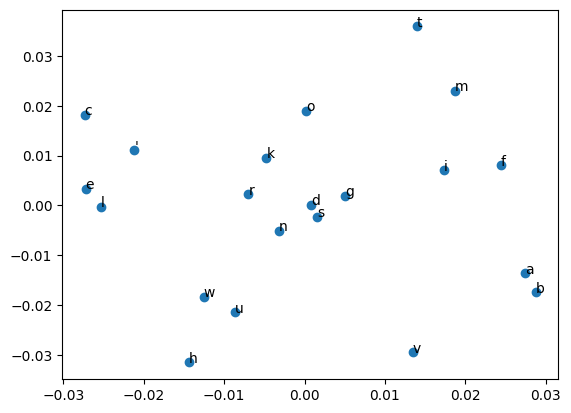

In [45]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Define training data
sentences = ["i'm", 'forever', 'taking', 'some', 'time', 'out', 'to', 'have', 'a', 'lie', 'down', 'because', 'i', 'feel', 'weird']


# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors  # Correct way to access vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # Correct way to get vocabulary words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


Wordcloud

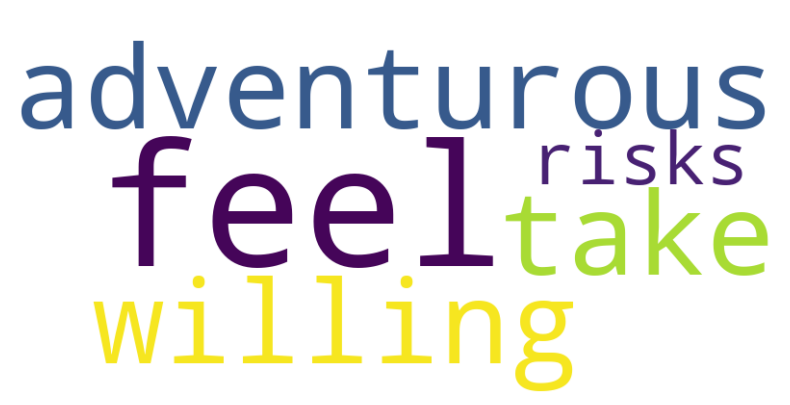

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(emotions)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most common words

In [54]:
from collections import Counter
import re

# Example text (could be replaced with your code snippets or any text data)
text = emotions

# Tokenize the text into words
words = re.findall(r'\b\w+\b', text.lower())  # Convert to lower case and find all whole words

# Count the words
word_counts = Counter(words)

# Display the 10 most common words
most_common_words = word_counts.most_common(10)
print("Most common words:", most_common_words)


Most common words: [('i', 1), ('feel', 1), ('more', 1), ('adventurous', 1), ('willing', 1), ('to', 1), ('take', 1), ('risks', 1)]


Most common sentences

In [55]:
from collections import Counter

# Assuming `text` is a block of code or any text data
sentences = text.split('\n')  # Simple split by new line; adjust based on your text structure

# Count the sentences
sentence_counts = Counter(sentences)

# Display the 5 most common sentences
most_common_sentences = sentence_counts.most_common(5)
print("Most common sentences:", most_common_sentences)


Most common sentences: [('i feel more adventurous willing to take risks', 1)]
